# Data Description

                 
   The World Happiness Report is a landmark survey of the state of global happiness. The first report was published in 2012, the second in 2013, the third in 2015, and the fourth in the 2016 Update. The World Happiness 2017, which ranks 155 countries by their happiness levels, was released at the United Nations at an event celebrating International Day of Happiness on March 20th. The reports review the state of happiness in the world today and show how the new science of happiness explains personal and national variations in happiness.

   The happiness scores and rankings use data from the Gallup World Poll. The scores are based on answers to the main life evaluation question asked in the poll. 
                   
   The columns following the happiness score estimate the extent to which each of six factors – economic production, social support, life expectancy, freedom, absence of corruption, and generosity – contribute to making life evaluations higher in each country than they are in Dystopia, a hypothetical country that has values equal to the world’s lowest national averages for each of the six factors. They have no impact on the total score reported for each country, but they do explain why some countries rank higher than others.
                  The following columns: GDP per Capita, Family, Life Expectancy, Freedom, Generosity, Trust Government Corruption describe the extent to which these factors contribute in evaluating the happiness in each country.

   The Dystopia Residual metric actually is the Dystopia Happiness Score(1.85) + the Residual value or the unexplained value for each country.
                   
                   

# Importing Libraries 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split


# Loading the dataset

In [2]:
df=pd.read_csv("happiness_score.csv")

In [72]:
df.head()

,Country,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,135,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,58,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,37,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,105,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,24,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [73]:
df.tail()

,Country,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
153,118,154,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
154,13,155,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
155,136,156,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
156,21,157,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302
157,141,158,2.839,0.06727,0.20868,0.13995,0.28443,0.36453,0.10731,0.16681,1.56726


In [4]:
df.shape #checking the data dimension

(158, 12)

In [5]:
df.dtypes

Country                           object
Region                            object
Happiness Rank                     int64
Happiness Score                  float64
Standard Error                   float64
Economy (GDP per Capita)         float64
Family                           float64
Health (Life Expectancy)         float64
Freedom                          float64
Trust (Government Corruption)    float64
Generosity                       float64
Dystopia Residual                float64
dtype: object

We have 158 rows and 12 columns in this dataset.

In [6]:
df.drop("Region",inplace=True,axis=1)

In [7]:
df

,Country,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...,...,...,...
153,Rwanda,154,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
154,Benin,155,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
155,Syria,156,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
156,Burundi,157,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302


In [8]:
#Statistical summary
df.describe()

,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,79.493671,5.375734,0.047885,0.846137,0.991046,0.630259,0.428615,0.143422,0.237296,2.098977
std,45.754363,1.145010,0.017146,0.403121,0.272369,0.247078,0.150693,0.120034,0.126685,0.553550
min,1.000000,2.839000,0.018480,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.328580
25%,40.250000,4.526000,0.037268,0.545808,0.856823,0.439185,0.328330,0.061675,0.150553,1.759410
50%,79.500000,5.232500,0.043940,0.910245,1.029510,0.696705,0.435515,0.107220,0.216130,2.095415
75%,118.750000,6.243750,0.052300,1.158448,1.214405,0.811013,0.549092,0.180255,0.309883,2.462415
max,158.000000,7.587000,0.136930,1.690420,1.402230,1.025250,0.669730,0.551910,0.795880,3.602140


In [9]:
df.columns

Index(['Country', 'Happiness Rank', 'Happiness Score', 'Standard Error',
       'Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)',
       'Freedom', 'Trust (Government Corruption)', 'Generosity',
       'Dystopia Residual'],
      dtype='object')

In [10]:
# Checking the null values in the set
df.isnull().sum()

Country                          0
Happiness Rank                   0
Happiness Score                  0
Standard Error                   0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Dystopia Residual                0
dtype: int64

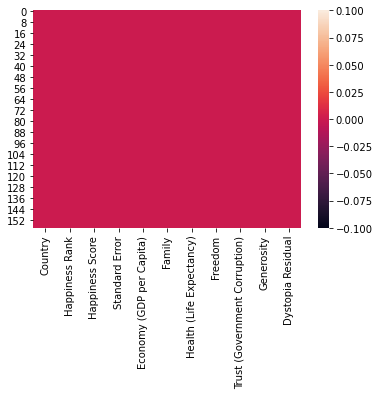

In [11]:
sns.heatmap(df.isnull())

There is no null values in the dataset

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000265DBEDFA90>,
      dtype=object)

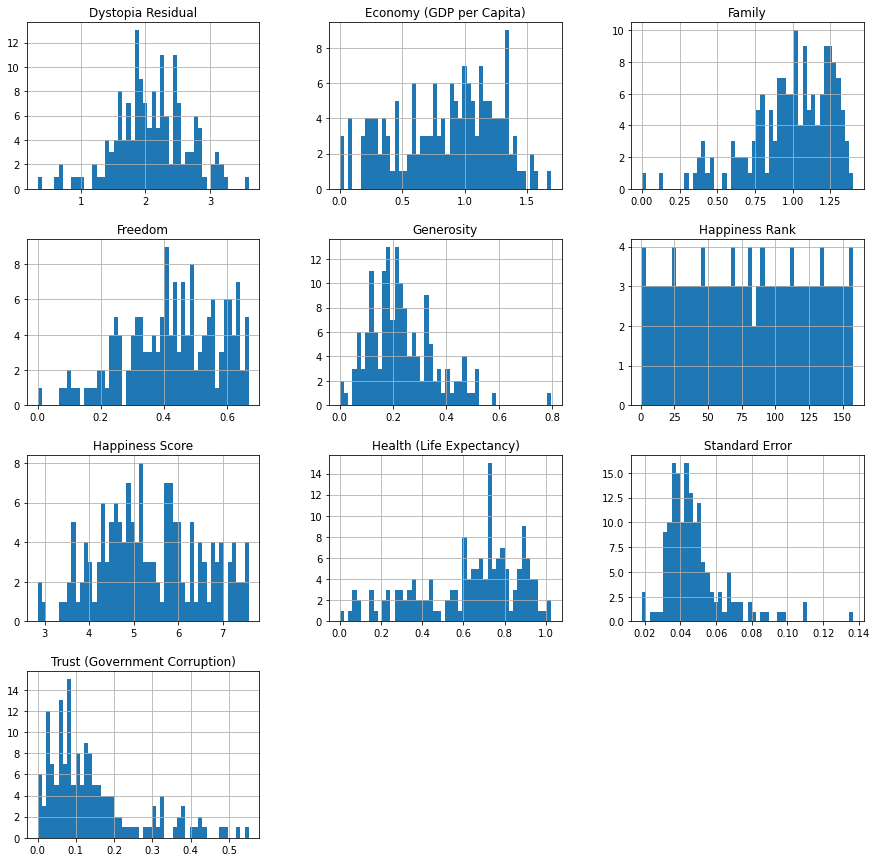

In [12]:
df.hist(bins=50,figsize=(15,15))

Text(0.5, 1.0, 'Top 10 happiest countries')

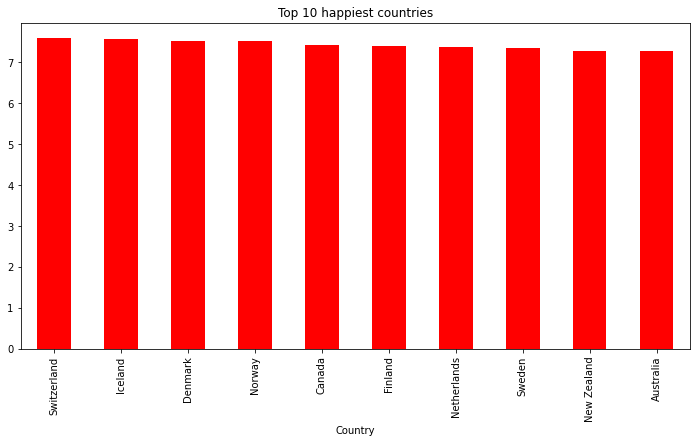

In [13]:
df.groupby('Country')['Happiness Score'].max().sort_values(ascending=False).head(10).plot(kind='bar', figsize=(12,6),color='Red')
plt.title('Top 10 happiest countries')

Text(0.5, 1.0, 'Top 10 Less happiest countries')

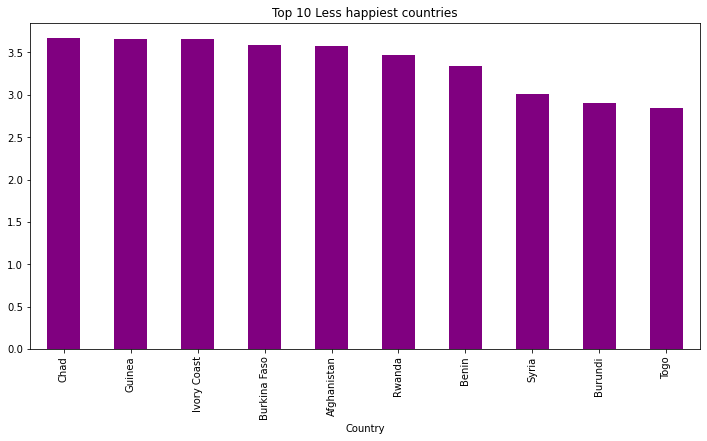

In [14]:
df.groupby('Country')['Happiness Score'].max().sort_values(ascending=False).tail(10).plot(kind='bar', figsize=(12,6),color='Purple')
plt.title('Top 10 Less happiest countries')

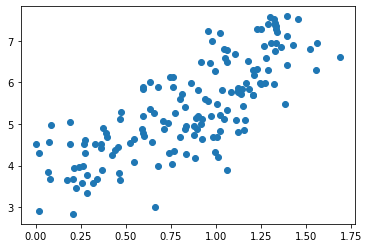

In [15]:
# Bivariate analysis
plt.scatter(df['Economy (GDP per Capita)'],df['Happiness Score'])
plt.show()

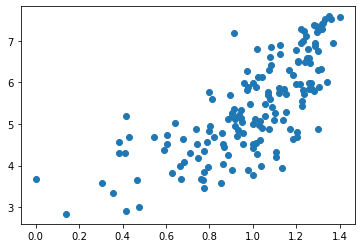

In [16]:
plt.scatter(df['Family'],df['Happiness Score'])
plt.show()

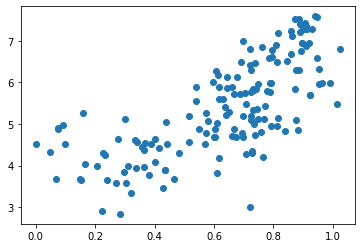

In [17]:
plt.scatter(df['Health (Life Expectancy)'],df['Happiness Score'])
plt.show()

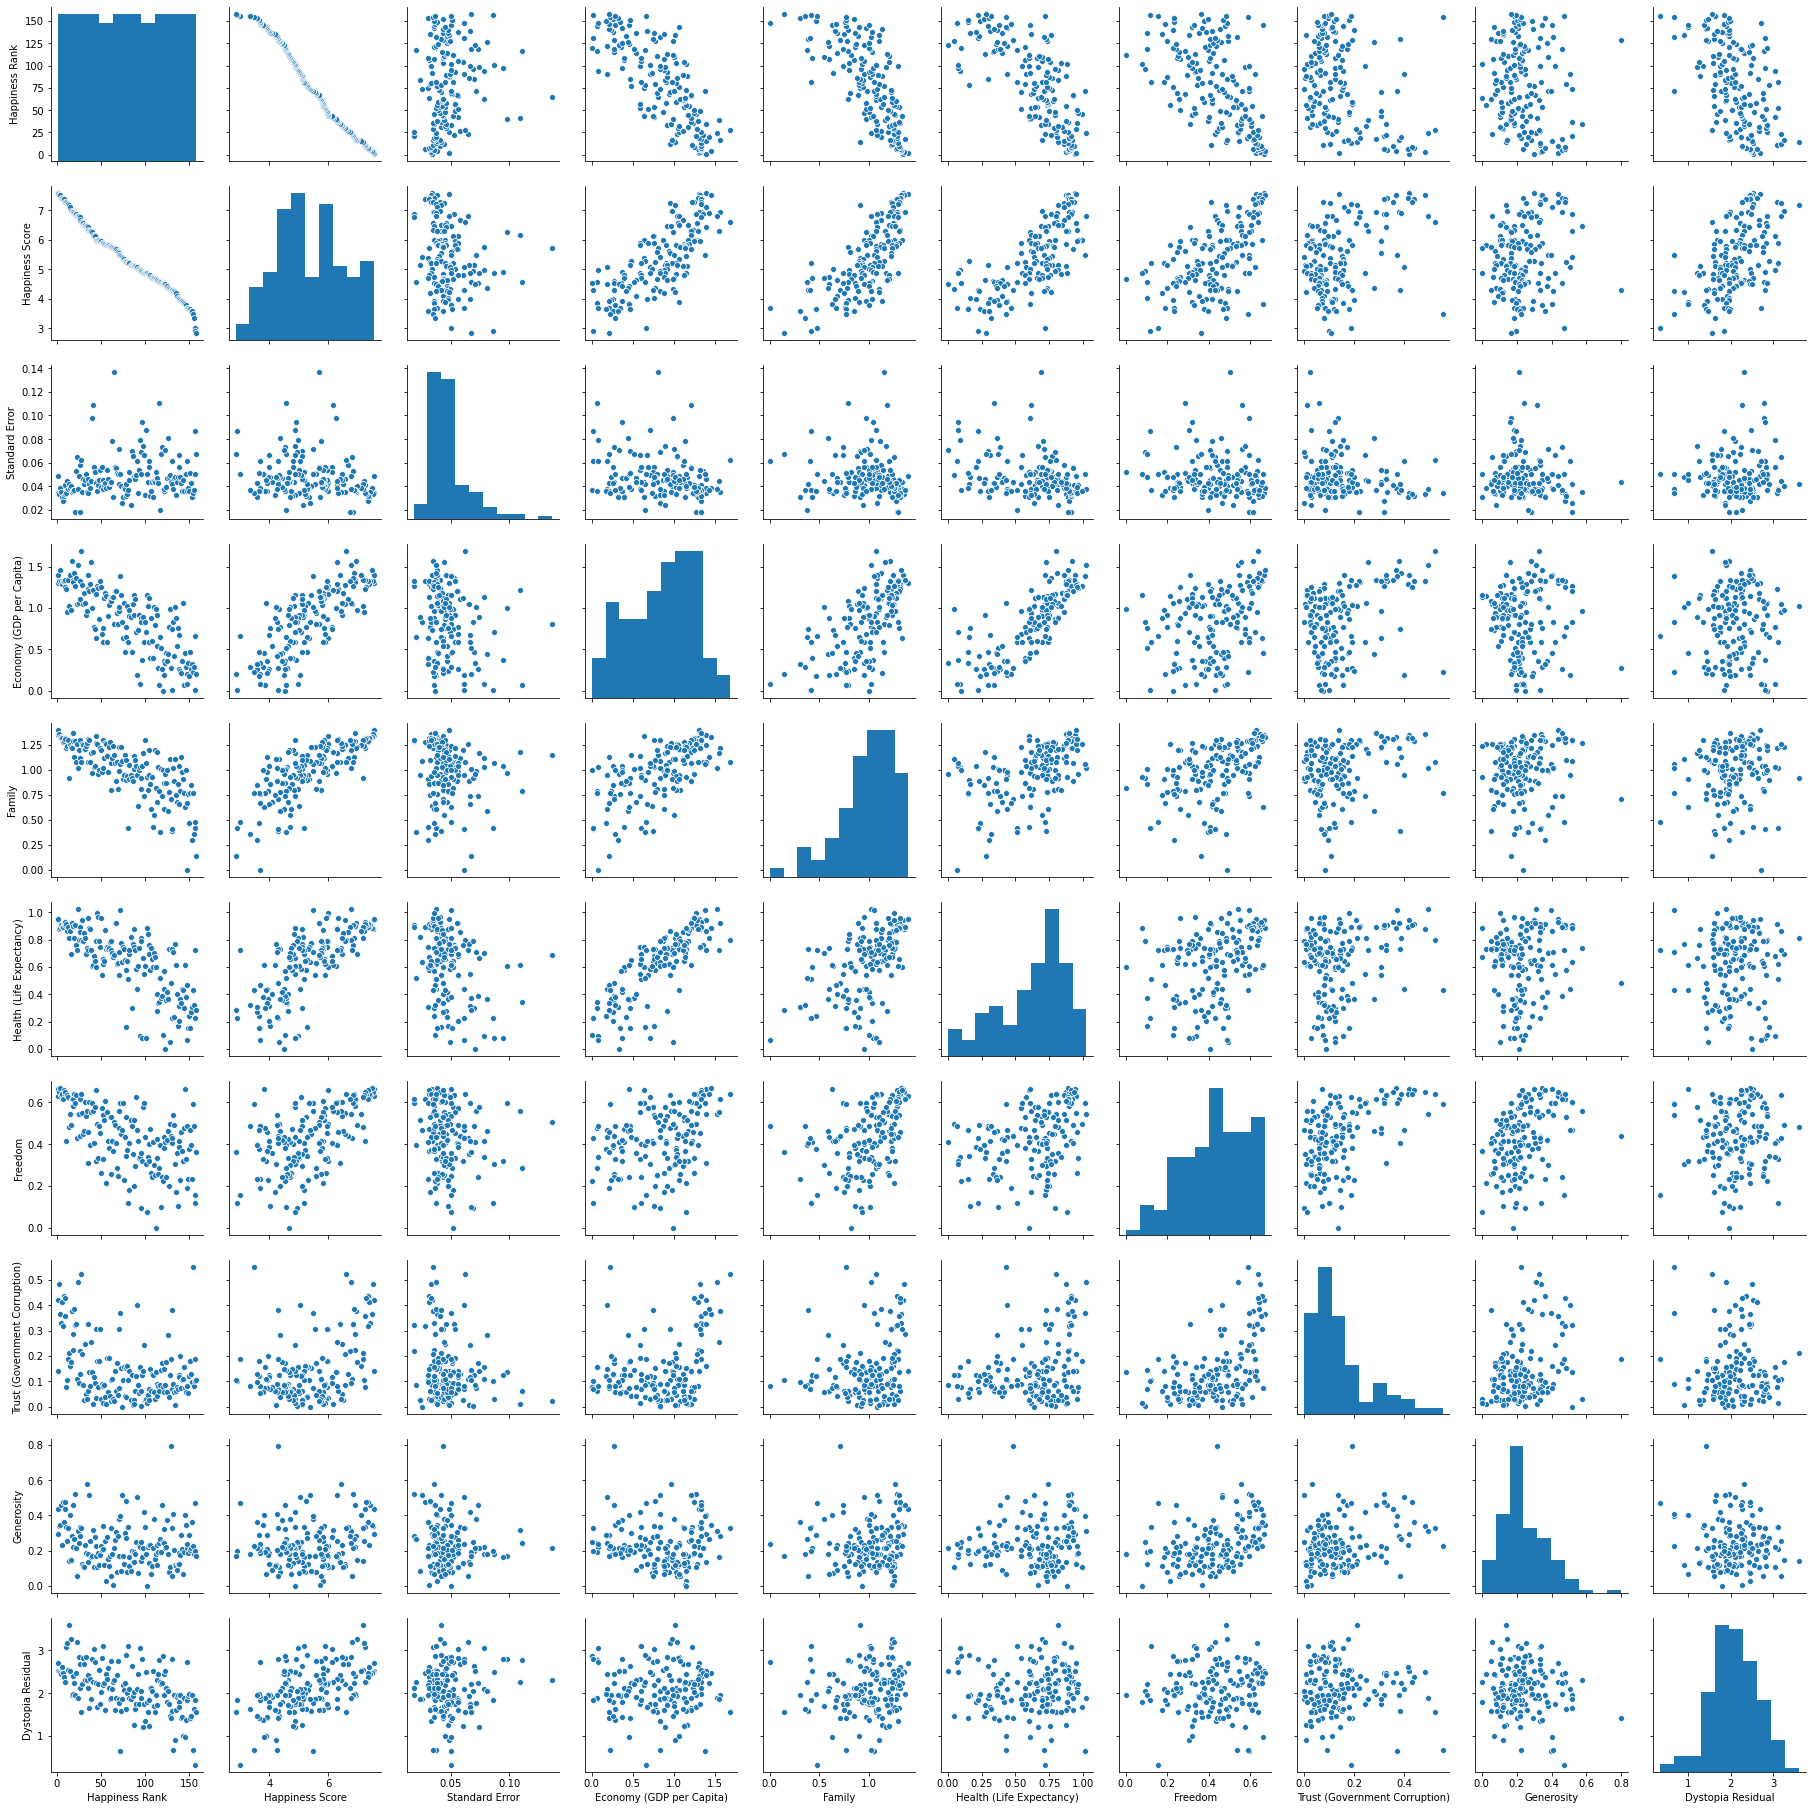

In [18]:
sns.pairplot(df)
plt.show()

# Checking Correlation

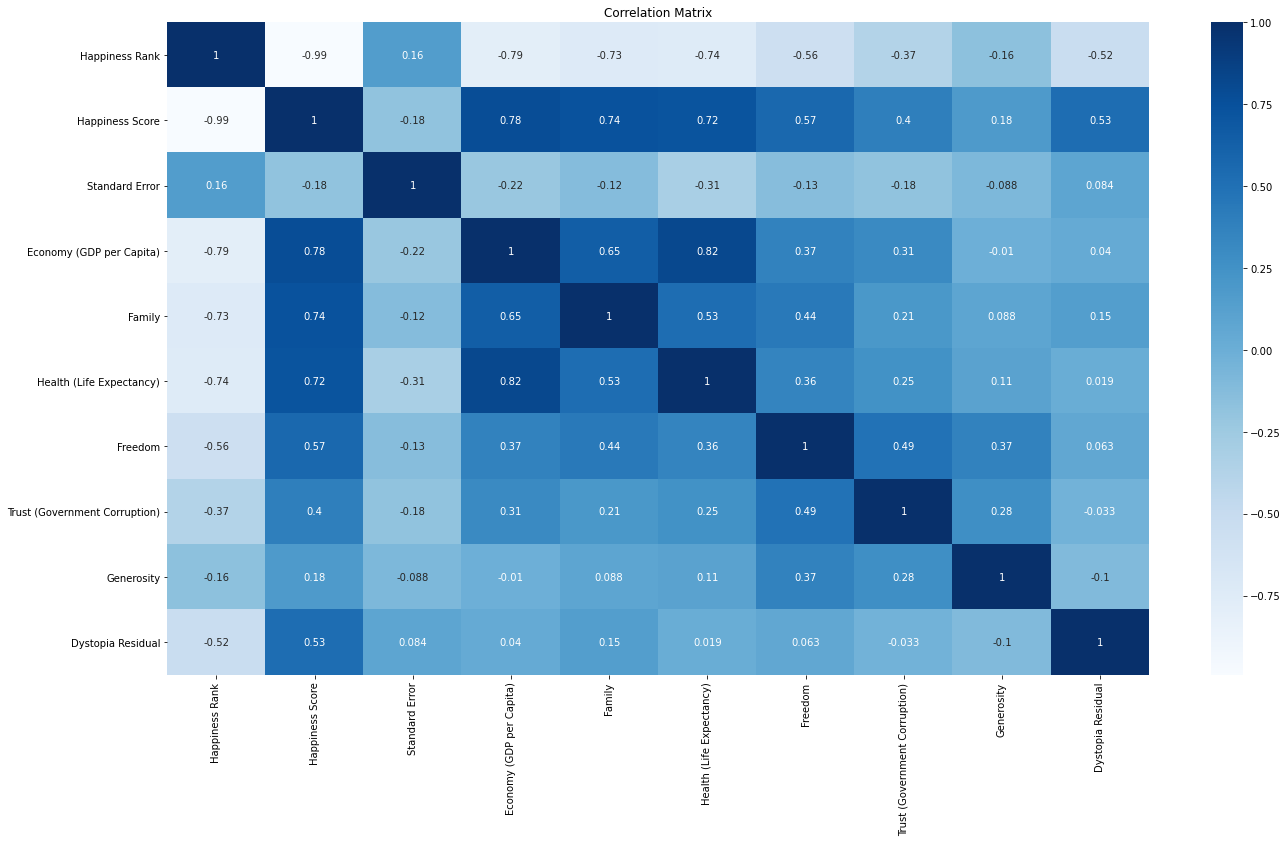

In [19]:
corr_mat=df.corr()

plt.figure(figsize=[22,12])
sns.heatmap(corr_mat,annot=True,cmap='Blues')
plt.title("Correlation Matrix")
plt.show()

Happiness score is highly correlated with Economy(GDP per capita),Family and Health.

In [20]:
from sklearn.preprocessing import LabelEncoder

In [22]:
le=LabelEncoder()
df['Country']=le.fit_transform(df['Country'])

In [23]:
df

,Country,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,135,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,58,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,37,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,105,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,24,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...,...,...,...
153,118,154,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
154,13,155,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
155,136,156,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
156,21,157,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302


In [24]:
# splitting the independent and target variable in x and y
x=df.drop('Happiness Score',axis=1)
y=df['Happiness Score']

# Checking Outliers

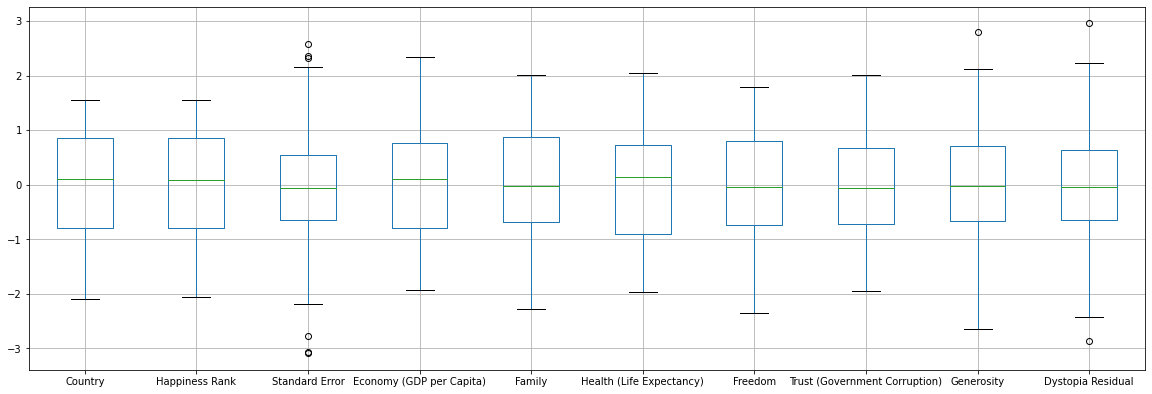

In [63]:
# plotting boxplot of all 22 columns
x.iloc[:,0:10].boxplot(figsize=[20,8])
plt.subplots_adjust(bottom=0.25)
plt.show()

There are total 7 outlies in 3 columns.But those are very near to whiskers.so these are not outliers.

# Checking data distribution among all columns

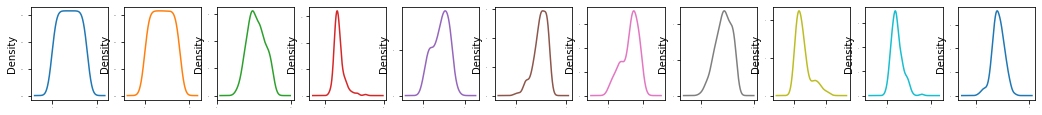

In [26]:
df.plot(kind='density',subplots=True,layout=(6,11),sharex=False,legend=False,fontsize=1,figsize=(18,12))
plt.show()

In [27]:
# Checking skewness
x.skew()

Country                          0.000000
Happiness Rank                   0.000418
Standard Error                   1.983439
Economy (GDP per Capita)        -0.317575
Family                          -1.006893
Health (Life Expectancy)        -0.705328
Freedom                         -0.413462
Trust (Government Corruption)    1.385463
Generosity                       1.001961
Dystopia Residual               -0.238911
dtype: float64

We can see the skewness in the dataset.we will remove this skewness by power_transform function.

In [28]:
from sklearn.preprocessing import power_transform
df_new=power_transform(x)

df_new=pd.DataFrame(df_new,columns=x.columns)

In [29]:
df_new.skew()

Country                         -0.279791
Happiness Rank                  -0.264365
Standard Error                  -0.020092
Economy (GDP per Capita)        -0.127233
Family                          -0.169651
Health (Life Expectancy)        -0.183181
Freedom                         -0.080728
Trust (Government Corruption)    0.185965
Generosity                       0.013320
Dystopia Residual                0.022925
dtype: float64

In [30]:
x=df_new

In [32]:
x

,Country,Happiness Rank,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,1.171069,-2.063414,-0.972226,1.446061,1.669206,1.491765,1.756335,1.773991,0.622391,0.750992
1,-0.344327,-2.008498,0.309350,1.173321,2.012132,1.532348,1.439946,0.315993,1.480995,1.110011
2,-0.845092,-1.958574,-1.062017,1.239836,1.739586,1.085223,1.615733,1.906792,0.927973,0.702275
3,0.620972,-1.912062,-0.503610,1.630246,1.553118,1.147600,1.792821,1.624007,0.964080,0.651035
4,-1.195601,-1.868100,-0.823548,1.242168,1.501726,1.270179,1.475479,1.503484,1.592224,0.625118
...,...,...,...,...,...,...,...,...,...,...
153,0.864172,1.490877,-0.916014,-1.494046,-0.959885,-0.939459,1.135229,2.012856,0.065304,-2.393259
154,-1.536462,1.508130,-0.719479,-1.360829,-1.896644,-1.276496,0.307514,-0.433835,-0.334169,-0.863565
155,1.188769,1.525352,0.399137,-0.513469,-1.690664,0.262933,-1.668658,0.738915,1.659336,-2.866216
156,-1.283328,1.542544,1.926902,-1.894954,-1.796803,-1.525700,-1.849903,-0.151946,-0.194829,-0.514801


In [33]:
y

0      7.587
1      7.561
2      7.527
3      7.522
4      7.427
       ...  
153    3.465
154    3.340
155    3.006
156    2.905
157    2.839
Name: Happiness Score, Length: 158, dtype: float64

In [34]:
x.shape

(158, 10)

In [35]:
y.shape

(158,)

# Train-Test Split

In [36]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.33,random_state=42)

In [37]:
x_train.shape

(105, 10)

In [38]:
x_test.shape

(53, 10)

In [39]:
y_train.shape

(105,)

In [40]:
y_test.shape

(53,)

In [41]:
lm=LinearRegression()

In [42]:
lm.fit(x_train,y_train)

LinearRegression()

In [43]:
lm.score(x_train,y_train)

0.9935453213372817

In [44]:
lm.coef_

array([ 0.00339425, -0.36720355, -0.0050302 ,  0.28083345,  0.19018122,
        0.16555116,  0.10364647,  0.041934  ,  0.05696581,  0.36634586])

In [45]:
lm.intercept_

5.372048240260254

In [46]:
pred=lm.predict(x_test)

In [47]:
print('predicted value and actual value',pred,y_test)

predicted value and actual value [3.99551435 6.15090026 4.1316051  3.26730435 4.7840358  6.62484853
 4.93974197 4.70639264 4.88378876 3.9498056  6.8440606  5.76790528
 7.04093633 5.46585642 6.80438496 6.57396466 4.50977364 4.61019512
 5.03495422 5.68701439 3.69213834 7.01230094 7.26473918 7.26415578
 6.48859393 5.14924558 5.87889261 3.90769425 4.24508781 3.72121277
 3.76096332 5.3026092  4.0061715  5.88196208 4.26992504 5.09976439
 3.54074448 6.09457953 5.52246638 4.47826529 6.64793    4.05434631
 5.13616033 3.7411823  6.34168293 5.24985302 6.87031865 4.22222218
 3.88190251 7.3007919  5.15919464 5.50015302 4.3263888 ] 128    4.307
45     5.987
134    4.194
156    2.905
90     5.057
29     6.574
96     4.898
98     4.876
95     4.949
140    3.931
19     6.901
56     5.828
15     6.983
69     5.548
24     6.786
30     6.505
122    4.507
109    4.686
93     4.971
65     5.695
150    3.655
18     6.937
12     7.200
9      7.284
31     6.485
81     5.192
51     5.889
139    3.956
125    4.3

In [48]:
print("error:")


print("Mean absolute error:",mean_absolute_error(y_test,pred))
print("Mean squared error:",mean_squared_error(y_test,pred))
print("Root mean squared error:",np.sqrt(mean_squared_error(y_test,pred)))

error:
Mean absolute error: 0.07200796320685851
Mean squared error: 0.010516621465108202
Root mean squared error: 0.10255058003301688


In [49]:
# r2  score->coefficient of determination
from sklearn.metrics import r2_score
print(r2_score(pred,y_test))

0.9921514449876568


# Regularization

In [54]:
from sklearn.linear_model import Lasso,Ridge

In [55]:
ls=Lasso(alpha=.0001)
ls.fit(x_train,y_train)
ls.score(x_train,y_train)

0.9935447666646764

In [56]:
ridge=Ridge(alpha=.0001)
ridge.fit(x_train,y_train)
ridge.score(x_train,y_train)

0.9935453213371047

In [57]:
ls.coef_

array([ 0.00307152, -0.37484404, -0.00505258,  0.27813589,  0.18842881,
        0.16371654,  0.10256084,  0.04119669,  0.05624953,  0.36277724])

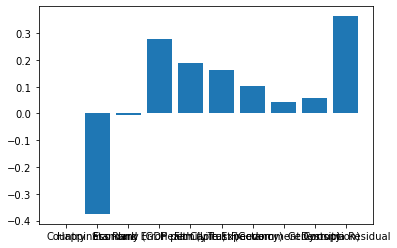

In [61]:
plt.bar(x.columns,ls.coef_)
plt.show()

In [51]:
#ElasticNet is a combination of both Lasso and Ridge

from sklearn.linear_model import ElasticNet
enr=ElasticNet(alpha=0.0001)
#enr=ElaticNet()
enr.fit(x_train,y_train)
enrpred=enr.predict(x_test)
print(enr.score(x_train,y_train))
enr.coef_

0.9935450922326433


array([ 0.0032007 , -0.37214793, -0.00505809,  0.27908819,  0.18904858,
        0.16436092,  0.1029456 ,  0.04146384,  0.05650796,  0.36403228])

In [52]:
from sklearn.svm  import SVR
kernellist=['linear','poly','rbf']
for i in kernellist:
    sv=SVR(kernel=i)
    sv.fit(x_train,y_train)
    print(sv.score(x_train,y_train))

0.992898628472816
0.9684956093938697
0.9834624756986472


In [65]:
from sklearn.tree import DecisionTreeRegressor

In [67]:
dtr=DecisionTreeRegressor()
dtr.fit(x_train,y_train)
pred_y=dtr.predict(x_test)
print(dtr.score(x_train,y_train))

1.0


In [68]:
from sklearn.neighbors import KNeighborsRegressor

In [69]:
knr=KNeighborsRegressor()
knr.fit(x_train,y_train)
pred_y=knr.predict(x_test)
print(knr.score(x_train,y_train))

0.9269896211680047


The best model is DecisionTreeRegressor. It gives 100% accuracy.

In [71]:
import joblib
    
joblib.dump(knr,"World Happiness Project.obj")

p=joblib.load("World Happiness Project.obj")

p.predict(x_test)


array([4.1456, 6.0882, 4.3588, 4.0664, 4.5282, 6.05  , 4.5716, 4.7346,
       5.1132, 4.4922, 7.2544, 5.6402, 6.3164, 5.6848, 6.3192, 6.0068,
       4.7216, 4.9674, 4.5716, 5.5394, 4.0184, 7.1762, 7.3722, 7.3722,
       6.9722, 5.2578, 5.5078, 4.0014, 4.0568, 4.2506, 4.6024, 5.4082,
       4.0184, 5.6364, 4.8518, 5.117 , 4.1424, 6.07  , 5.7674, 4.8122,
       6.2346, 4.0344, 4.9952, 3.8372, 6.5926, 4.8946, 6.3642, 4.7184,
       4.3282, 6.9224, 5.6062, 5.2084, 4.4392])